## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [102]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

import numpy as np

In [103]:
import matplotlib.pyplot as  plt
%matplotlib inline
from IPython.display import display

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [104]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [105]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

original, no noise


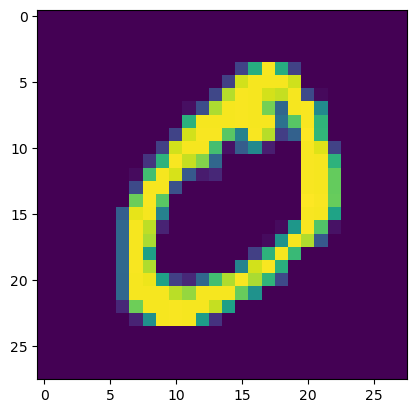

In [106]:
print("original, no noise")
plt.imshow(x_train[1])

a little noise added


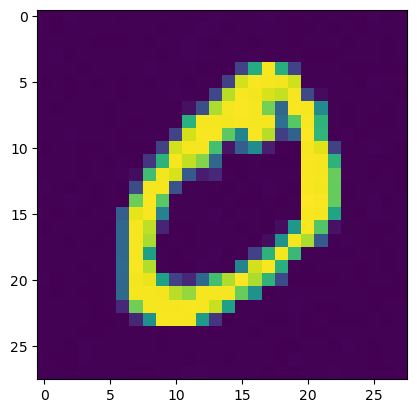

In [107]:
noisy = x_train + np.random.normal(0,.5,(60000,28,28))
print("a little noise added")
plt.imshow(noisy[1])

very noisy


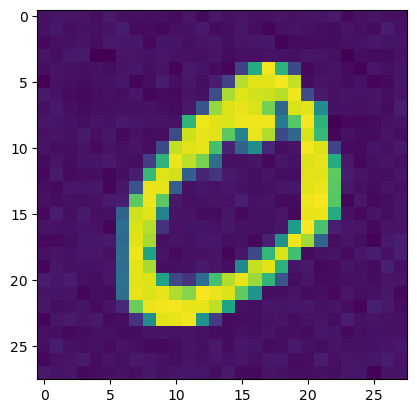

In [108]:
noisy2 = x_train + np.random.normal(0,4,(60000,28,28))
print("very noisy")
plt.imshow(noisy2[1])

In [109]:
scale = [0, 0.1, 0.5, 1.0, 2.0, 4.0]
batch_size = 128
num_classes = 10
epochs = 20
# Noise is added here
# The max value of the noise should not grossly surpass 1.0
for s in scale:
    noise_train = np.random.normal(0, 0, size=(60000, 28, 28))
    new_train = noise_train + x_train
    noise_test = np.random.normal(0, 0, size=(10000, 28, 28))
    new_test = noise_test + x_test
    
    new_train = new_train.reshape(60000, 784)
    new_test = new_test.reshape(10000, 784)
    new_train = new_train.astype('float32')
    new_test = new_test.astype('float32')
    new_train /= 255
    new_test /= 255
    
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])

    model.fit(new_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(new_test, y_test))
    
    score = model.evaluate(new_test, y_test, verbose=0)
    print('Scores for noise scale ' + str(s))
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

Epoch 18/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0226 - accuracy: 0.9947 - val_loss: 0.1006 - val_accuracy: 0.9835
Epoch 19/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0258 - accuracy: 0.9938 - val_loss: 0.0886 - val_accuracy: 0.9835
Epoch 20/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0265 - accuracy: 0.9940 - val_loss: 0.1049 - val_accuracy: 0.9800
Scores for noise scale 0.1
Test loss: 0.10485726594924927
Test accuracy: 0.9800000190734863
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 512)               401920    
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               262

 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,489,960
Trainable params: 1,489,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 16s 26ms/step - loss: 0.1098 - accuracy: 0.9892 - val_loss: 0.1212 - val_accuracy: 0.9812
Epoch 2/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0532 - accuracy: 0.9913 - val_loss: 0.1149 - val_accuracy: 0.9822
Epoch 3/20
469/469 [======================

469/469 [==============================] - 15s 32ms/step - loss: 0.1784 - accuracy: 0.9692 - val_loss: 0.2196 - val_accuracy: 0.9613
Epoch 7/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2086 - accuracy: 0.9629 - val_loss: 0.1934 - val_accuracy: 0.9672
Epoch 8/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1738 - accuracy: 0.9697 - val_loss: 0.1838 - val_accuracy: 0.9715
Epoch 9/20
469/469 [==============================] - 14s 31ms/step - loss: 0.1601 - accuracy: 0.9730 - val_loss: 0.1747 - val_accuracy: 0.9715
Epoch 10/20
469/469 [==============================] - 14s 30ms/step - loss: 0.1677 - accuracy: 0.9717 - val_loss: 0.2170 - val_accuracy: 0.9642
Epoch 11/20
469/469 [==============================] - 14s 30ms/step - loss: 0.2282 - accuracy: 0.9553 - val_loss: 0.2368 - val_accuracy: 0.9552
Epoch 12/20
469/469 [==============================] - 14s 29ms/step - loss: 0.2080 - accuracy: 0.9611 - val_loss: 0.2294 - val_accuracy: 0.9561


Epoch 12/20
469/469 [==============================] - 16s 33ms/step - loss: 1.0148 - accuracy: 0.6141 - val_loss: 0.8322 - val_accuracy: 0.6791
Epoch 13/20
469/469 [==============================] - 16s 34ms/step - loss: 1.2156 - accuracy: 0.5461 - val_loss: 1.3663 - val_accuracy: 0.4649
Epoch 14/20
469/469 [==============================] - 16s 34ms/step - loss: 1.2675 - accuracy: 0.4964 - val_loss: 1.2321 - val_accuracy: 0.4864
Epoch 15/20
469/469 [==============================] - 17s 35ms/step - loss: 1.1191 - accuracy: 0.5296 - val_loss: 1.0299 - val_accuracy: 0.5707
Epoch 16/20
469/469 [==============================] - 16s 34ms/step - loss: 1.0752 - accuracy: 0.5448 - val_loss: 1.0453 - val_accuracy: 0.5715
Epoch 17/20
469/469 [==============================] - 15s 32ms/step - loss: 0.9758 - accuracy: 0.6197 - val_loss: 0.9282 - val_accuracy: 0.6466
Epoch 18/20
469/469 [==============================] - 15s 32ms/step - loss: 1.1279 - accuracy: 0.5638 - val_loss: 1.2162 - val_ac

### As expected increased noise increases losses and decreases accuracy

In [110]:
losses = [0.0777, 0.1049, 0.1204, 0.1763, 0.2333, 1.2653]
accuracy = [0.9839, 0.9800, 0.9807, 0.9709, 0.9591, 0.5087]

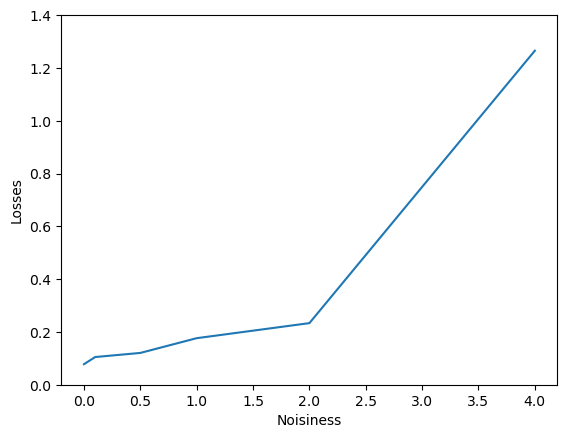

In [113]:
plt.figure()
plot = plt.plot(scale, losses)
plt.ylim([0, 1.4])
plt.xlabel('Noisiness')
plt.ylabel('Losses')
plt.show()

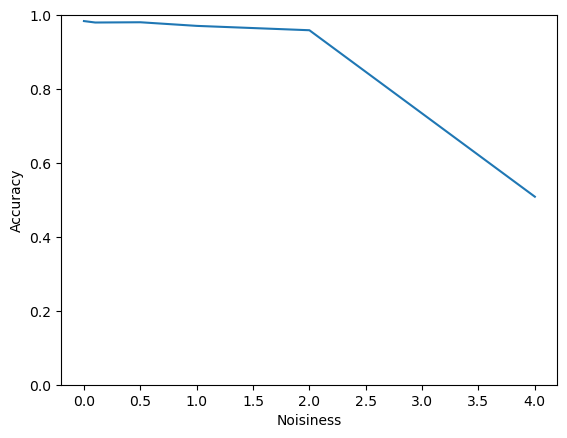

In [115]:
plt.figure()
plot = plt.plot(scale, accuracy)
plt.ylim([0, 1])
plt.xlabel('Noisiness')
plt.ylabel('Accuracy')
plt.show()